In [35]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [36]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# Set number of classes

In [37]:
NUM_CLASSES = 65

# Dataset reading

In [38]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [39]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [42]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 65)                715       
                                                                 
Total params: 1785 (6.97 KB)
Trainable params: 1785 (6.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [44]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [45]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
28/51 [===============>..............] - ETA: 0s - loss: 4.1732 - accuracy: 0.0240     
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
51/51 [==============================] - 2s 17ms/step - loss: 4.1533 - accuracy: 0.0294 - val_loss: 4.1094 - val_accuracy: 0.0557
Epoch 2/1000
29/51 [================>.............] - ETA: 0s - loss: 4.0643 - accuracy: 0.0541
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
51/51 [==============================] - 0s 3ms/step - loss: 4.0254 - accuracy: 0.0550 - val_loss: 3.8954 - val_accuracy: 0.0734
Epoch 3/1000
 1/51 [..............................] - ETA: 0s - loss: 3.9039 - accuracy: 0.0781

/Users/jasmeetsingh/opt/anaconda3/envs/signlanguage/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/51 [=================>............] - ETA: 0s - loss: 3.8235 - accuracy: 0.0571
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
51/51 [==============================] - 0s 3ms/step - loss: 3.7772 - accuracy: 0.0630 - val_loss: 3.5934 - val_accuracy: 0.0822
Epoch 4/1000
30/51 [================>.............] - ETA: 0s - loss: 3.5962 - accuracy: 0.0784
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
51/51 [==============================] - 0s 3ms/step - loss: 3.5612 - accuracy: 0.0812 - val_loss: 3.3771 - val_accuracy: 0.1050
Epoch 5/1000
44/51 [========================>.....] - ETA: 0s - loss: 3.4104 - accuracy: 0.0886
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
51/51 [==============================] - 0s 2ms/step - loss: 3.4004 - accuracy: 0.0895 - val_loss: 3.2129 - val_accuracy: 0.1333
Epoch 6/1000
43/51 [========================>.....] - ETA: 0s - loss: 3.2745 - accuracy: 0.1088
Epoch 6: savin

In [46]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

17/17 [==============================] - 0s 1ms/step - loss: 1.4191 - accuracy: 0.5922


In [47]:
# Load the saved model
model = tf.keras.models.load_model(model_save_path)

In [48]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 49ms/step
[1.35756895e-01 2.34365565e-04 1.32263210e-02 2.21760548e-03
 1.00586556e-01 1.19918119e-03 9.91626434e-18 9.93429567e-05
 2.80646175e-01 2.79403112e-10 2.60153483e-05 1.18421605e-02
 1.96319707e-02 1.42098982e-02 1.08526051e-01 4.53416895e-16
 2.60257293e-02 1.21779727e-16 3.83432128e-18 1.44259885e-17
 7.11286440e-03 2.25465628e-04 1.52760052e-15 5.16448727e-18
 9.40914638e-18 1.88553531e-16 2.42551144e-17 1.30546813e-18
 7.03936392e-17 1.05317271e-15 5.20148242e-17 1.92593852e-17
 2.42308829e-17 5.04335394e-17 5.73253238e-17 7.96778995e-18
 3.60496975e-02 4.84657648e-04 1.06729604e-01 1.01097552e-02
 5.71729569e-03 2.79612020e-02 4.33146721e-04 3.33872013e-05
 1.17505188e-05 6.89560547e-03 2.65668379e-04 3.80433335e-07
 2.68040603e-04 2.44297553e-06 8.18716958e-02 7.33858615e-05
 2.40104666e-04 5.56619489e-06 2.68450040e-05 2.54312965e-07
 2.38983546e-07 3.12591112e-07 2.33758712e-07 4.20663622e-04
 5.17525012e-04 3.13906319e-04 7.

# Confusion matrix

68/68 [==============================] - 0s 832us/step


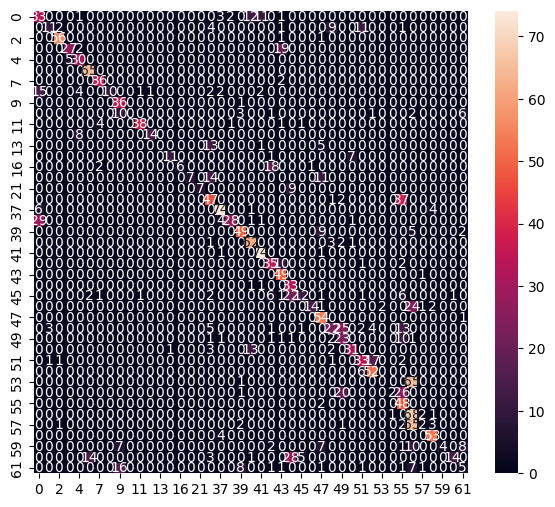

Classification Report
              precision    recall  f1-score   support

           0       0.40      0.52      0.45        63
           1       0.73      0.28      0.41        39
           2       0.93      0.97      0.95        58
           3       0.84      0.56      0.68        48
           4       0.67      0.86      0.75        35
           5       0.80      1.00      0.89        65
           7       0.84      0.95      0.89        38
           8       1.00      0.27      0.43        37
           9       0.52      0.97      0.68        37
          10       0.00      0.00      0.00        23
          11       0.95      0.84      0.89        45
          12       0.93      0.64      0.76        22
          13       0.00      0.00      0.00        19
          14       0.92      0.58      0.71        19
          16       1.00      0.22      0.36        27
          20       1.00      0.22      0.36        32
          21       1.00      0.44      0.61        16
     

/Users/jasmeetsingh/opt/anaconda3/envs/signlanguage/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jasmeetsingh/opt/anaconda3/envs/signlanguage/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jasmeetsingh/opt/anaconda3/envs/signlanguage/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [50]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/jasmeetsingh/opt/anaconda3/envs/signlanguage/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
# Transform model (quantization)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/tmp_a4o1pag/assets


INFO:tensorflow:Assets written to: /var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/tmp_a4o1pag/assets
2024-02-22 14:55:59.705131: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-02-22 14:55:59.705154: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-02-22 14:55:59.705386: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/tmp_a4o1pag
2024-02-22 14:55:59.706507: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-02-22 14:55:59.706518: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/_n/1h3840qn1sg09pcwzm774m_m0000gn/T/tmp_a4o1pag
2024-02-22 14:55:59.709623: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-02-22 14:55:59.743942: I tensorflow/cc/saved_model/loader.cc:217] Running initialization

9256

# Inference test

In [52]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [53]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [54]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

on-Converted Ops: 6, Total Ops 13, % non-converted = 46.15 %
 * 6 ARITH ops

- arith.constant:    6 occurrences  (f32: 6)



  (f32: 3)
  (f32: 1)


In [55]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 67 µs, sys: 37 µs, total: 104 µs
Wall time: 109 µs


In [56]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.35756850e-01 2.34365783e-04 1.32263266e-02 2.21760338e-03
 1.00586526e-01 1.19918119e-03 9.91626683e-18 9.93429785e-05
 2.80646205e-01 2.79403639e-10 2.60153520e-05 1.18421689e-02
 1.96319632e-02 1.42098954e-02 1.08526066e-01 4.53416895e-16
 2.60257404e-02 1.21779740e-16 3.83430722e-18 1.44259902e-17
 7.11286254e-03 2.25465308e-04 1.52759502e-15 5.16448851e-18
 9.40911081e-18 1.88553584e-16 2.42550250e-17 1.30546347e-18
 7.03936458e-17 1.05316869e-15 5.20150261e-17 1.92594596e-17
 2.42308879e-17 5.04335427e-17 5.73251120e-17 7.96782139e-18
 3.60497013e-02 4.84657416e-04 1.06729619e-01 1.01097515e-02
 5.71729569e-03 2.79611573e-02 4.33146779e-04 3.33872376e-05
 1.17505087e-05 6.89560920e-03 2.65668146e-04 3.80433335e-07
 2.68040749e-04 2.44297780e-06 8.18717256e-02 7.33858542e-05
 2.40104666e-04 5.56619034e-06 2.68450058e-05 2.54312994e-07
 2.38983318e-07 3.12591112e-07 2.33758485e-07 4.20663680e-04
 5.17524837e-04 3.13906319e-04 7.45396829e-16 2.08966204e-17
 3.15608645e-17]
8
